This is an implementation of a tabular reinforcement learning agent that plays tic tac toe, as descibed in  Sutton and Barto's "Reinfrocement Learning, an introduction"

In [0]:
import math
import random
from collections import deque
import numpy as np
import matplotlib.pyplot as plt


We first need to define a function, which returns all the possible actions that a player can make in a given game state

For the sake of simplicty states will be represented by lists of 9 elements, each corresponding to one tile within the tic tac toe board

In [0]:
def getPossibleActions(player,state):
  states = []
  for q in range(9):
    if state[q] == 0:
      
      newstate = state[:]
      newstate[q] = player
      states.append(newstate)
  return states
      

NExt step is a function for checking if the game is finished and what the outcome is.
The function checks all verticals and horizontal of the boards as well as the diagonals. Finally it checks for draw as well. 
It returns 0 for non-terminal states, 1 when p1 has won, 2 when p2 has won and 3 when the game ended in a draw

In [0]:
def checkTerminal(state):
  
  for q in range(3):
    if state[3*q] == state[3*q +1] and state[3*q] == state[3*q+2] and state[3*q] != 0:
      return state[3*q]
    if state[q] == state[q + 3] and state[q] == state[q + 6] and state[q] != 0:
      return state[q]
  if state[0] == state[4] and state[0] == state[8] and state[0] != 0:
    return state[0]
  if state[2] == state[4] and state[2] == state[6] and state[2] != 0:
    return state[2]
  
  if state.count(0) == 0:
    return 3
    
  return 0

The class for the RL agent
It keeps a table of all the states that have been visited and their values
At the end of each episode the values are updated

This approach uses state values V(S), defines as V(S) = r +γ V(S')
where S' is the state ovserved after S and γ is the discount factor


In [0]:

class agent:
  
  def __init__(self):
    self.gamma = 0.999 #discount factor
    self.alpha = 0.01 #learning rate
    self.visited = [] #list of all states that have been visited
    self.values = []  #correspndonig values of visited states
  
  #Updates the values of all states that have been visited in one episode
  def update(self,hist,reward):
    hist.reverse() #we go backwards, for easier computation of state values
    
    g = self.gamma #scaling of state value for time distance to rewrd 
    
    for state in hist:
      if state not in self.visited: #if state is not visited, set value to first observed value
        self.visited.append(state)
        self.values.append(reward*g)
      else: #else add alpha*observed value to current value
        i = self.visited.index(state)
        self.values[i] += self.alpha*g*reward
      
   
  #function for picking an action in a given state
  def pickAction(self,actions,e = 0.2):
    q = []
    for action in actions:
      if action in self.visited:
        q.append(self.values[self.visited.index(action)])
      else:
        q.append(0)
        
    if random.random() > e:
      return q.index(max(q))
    else:
      return random.randint(0,len(q)-1)
     
   
      



The next step is to simulate a few thousand games in which two agents will be learning by playing verus each other

In [0]:
#the two agents
ag1 = agent()
ag2 = agent()

#for keeping track of performance histories
perf = deque(maxlen = 100) 
perfh = np.zeros(0)
perfh2 = np.zeros(0)
perfh3 = np.zeros(0)


for game in range(100000):
  #observation histories for both players
  h1 = [] 
  h2 = []
  
  
  perfh = np.append(perfh,perf.count(1)/100)
  perfh2 = np.append(perfh2,perf.count(0)/100)
  perfh3 = np.append(perfh3,perf.count(-1)/100)
  state = [0,0,0,0,0,0,0,0,0] #inital game board
  
  
  while True:
    
    p1actions = getPossibleActions(1,state)
    
    a = ag1.pickAction(p1actions)
    state = p1actions[int(a)]
    h1.append(state)

    r = checkTerminal(state)

    if(r == 1):
    
      
      ag1.update(h1,1)
      ag2.update(h2,-1)
      
      perf.append(1)
      break
    if(r == 3):
     
     
      ag1.update(h1,0)
      ag2.update(h2,0)
      perf.append(0)
      break

    p2actions = getPossibleActions(2,state)
    
    a = ag2.pickAction(p2actions)
    state = p2actions[int(a)]
    h2.append(state)
    r = checkTerminal(state)

    if(r == 2):
     
      
      ag1.update(h1,-1)
      ag2.update(h2,1)
      perf.append(-1)
      break
    if(r == 3):
      
      
      ag1.update(h1,0)
      ag2.update(h2,0)
      perf.append(0)
      break


  

Moving average performance measure of games ending with
p1 win: blue
p2 win: red
draw: green

P1 is always much more likely to win, but as both agents become better draw becomes the most likely outcome

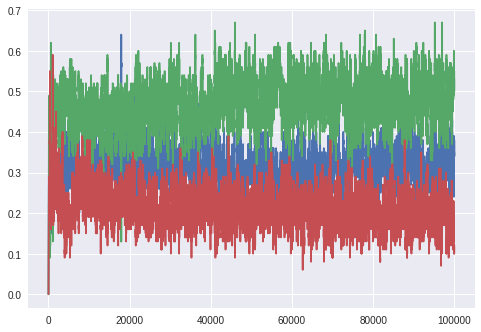

In [61]:
      
a = np.c_[perfh, perfh2,perfh3]
plt.plot(a)
plt.show()

This part is for testing the RL agent vs a player
Here the agent is p1 and the player is p2
the player is given the array of possible actions he can take and picks one by inputting the index of the desired action

I was too lazy to implement some better visualzaiton, but even paint is good enough to simulate a game

In [64]:
state = [0,0,0,0,0,0,0,0,0]
while True:
    
  p1actions = getPossibleActions(1,state)
    
  a = ag1.pickAction(p1actions, e = 0.0)
  state = p1actions[int(a)]
  print(state)

  r = checkTerminal(state)
  
  if(r == 1):
    
      
    print('p1 wins')
    
    break
  if(r == 3):
     
     
    print("draw")
    break

  p2actions = getPossibleActions(2,state)
  print(p2actions)
  a = input("action n: ")
  state = p2actions[int(a)]

  r = checkTerminal(state)

  if(r == 2):
    print("p2 wins")
      
    
    break
  if(r == 3):
     
    print("draw")
    break

[1, 0, 0, 0, 0, 0, 0, 0, 0]
[[1, 2, 0, 0, 0, 0, 0, 0, 0], [1, 0, 2, 0, 0, 0, 0, 0, 0], [1, 0, 0, 2, 0, 0, 0, 0, 0], [1, 0, 0, 0, 2, 0, 0, 0, 0], [1, 0, 0, 0, 0, 2, 0, 0, 0], [1, 0, 0, 0, 0, 0, 2, 0, 0], [1, 0, 0, 0, 0, 0, 0, 2, 0], [1, 0, 0, 0, 0, 0, 0, 0, 2]]
action n: 7
[1, 0, 0, 0, 0, 0, 1, 0, 2]
[[1, 2, 0, 0, 0, 0, 1, 0, 2], [1, 0, 2, 0, 0, 0, 1, 0, 2], [1, 0, 0, 2, 0, 0, 1, 0, 2], [1, 0, 0, 0, 2, 0, 1, 0, 2], [1, 0, 0, 0, 0, 2, 1, 0, 2], [1, 0, 0, 0, 0, 0, 1, 2, 2]]
action n: 0
[1, 2, 1, 0, 0, 0, 1, 0, 2]
[[1, 2, 1, 2, 0, 0, 1, 0, 2], [1, 2, 1, 0, 2, 0, 1, 0, 2], [1, 2, 1, 0, 0, 2, 1, 0, 2], [1, 2, 1, 0, 0, 0, 1, 2, 2]]
action n: 0
[1, 2, 1, 2, 1, 0, 1, 0, 2]
p1 wins


Example game:

this translates to:


**Final remarks**

After a good ammount of games the agent learns to chase a victory while preventing the other player from winning. 
Given enough training, p1 is sometimes capable of leanring the optimal strategy for the firt player. p1 has been observed to take one angle, then the opposite one forcing the second player to put one in the middle, then he plays one of the two remaiing corners, resulting in  two ways to win next turn.
